ÂºÄÂßãËøêË°å: ÂÆûÈ™å4: Âø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶
  Trial 0: Âø´Ë∑ØÂæÑËÉúÂà©=1, ÊÖ¢Ë∑ØÂæÑËÉúÂà©=0, Êó†ÂÜ≥Á≠ñ=0
  Trial 50: Âø´Ë∑ØÂæÑËÉúÂà©=44, ÊÖ¢Ë∑ØÂæÑËÉúÂà©=0, Êó†ÂÜ≥Á≠ñ=6
  Trial 100: Âø´Ë∑ØÂæÑËÉúÂà©=42, ÊÖ¢Ë∑ØÂæÑËÉúÂà©=0, Êó†ÂÜ≥Á≠ñ=8

ÂÆûÈ™å4ÁªìÊûú:
- Âø´Ë∑ØÂæÑËÉúÂà©: 129/150 (86.00%)
- ÊÖ¢Ë∑ØÂæÑËÉúÂà©: 0/150 (0.00%)
- Êó†ÂÜ≥Á≠ñ: 21/150 (14.00%)
- Âπ≥ÂùáÂèçÂ∫îÊó∂Èó¥: 16.3 Ê≠•
- Âø´Ë∑ØÂæÑÂπ≥ÂùáRT: 16.3 Ê≠•
- ÊÖ¢Ë∑ØÂæÑÂπ≥ÂùáRT: 0.0 Ê≠•


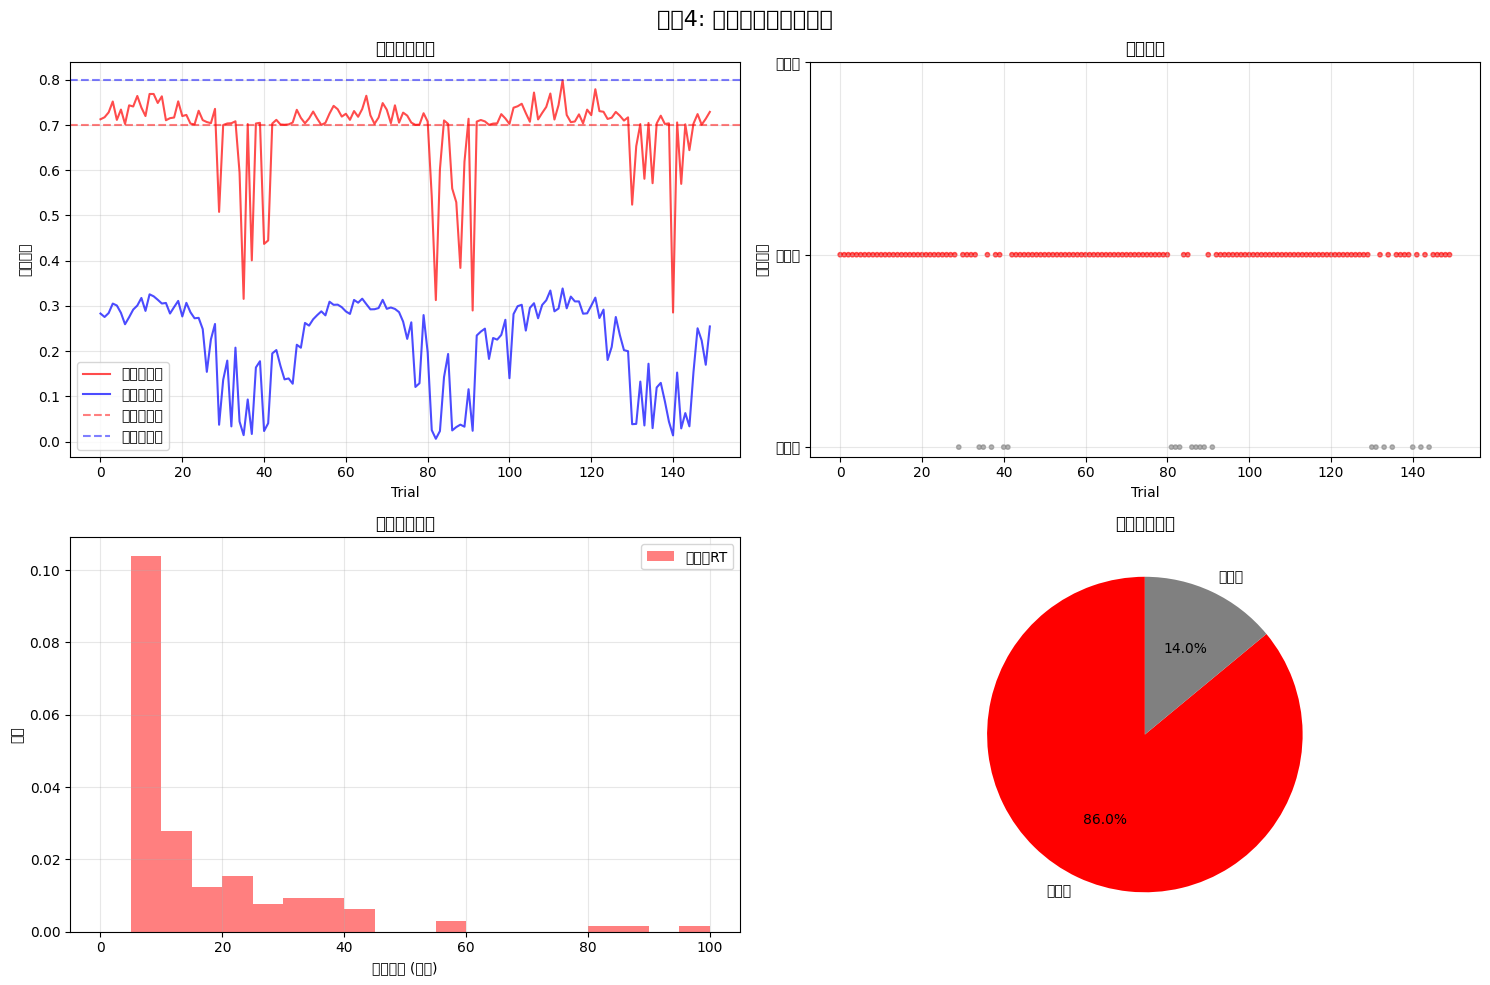

‚úÖ ÂÆûÈ™å4: Âø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶ ÂÆåÊàê



In [ ]:
# Cell 7: ÂÆûÈ™å4 - Âø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶ (‰øÆÂ§çÁâà)
# ================================================================================

def run_pathway_competition_experiment(T=200, fast_threshold=0.7, slow_threshold=0.8,
                                      show_plot=True):
    """
    ÂÆûÈ™å4: Âø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶

    Âª∫Ê®°Âø´ÊÖ¢Ë∑ØÂæÑÁöÑ"Á´û‰∫âÂà∞ËææÈòàÂÄº"Êú∫Âà∂
    """

    print("================================================================================")
    print("ÂºÄÂßãËøêË°å: ÂÆûÈ™å4: Âø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶")
    print("================================================================================")

    # ÂàùÂßãÂåñ
    fast_activity = []
    slow_activity = []
    decisions = []  # 0: Âø´Ë∑ØÂæÑËÉúÂà©, 1: ÊÖ¢Ë∑ØÂæÑËÉúÂà©, -1: Êú™ËææÂà∞
    reaction_times = []

    # Ë∑ØÂæÑÂèÇÊï∞
    fast_gain = 0.15    # Âø´Ë∑ØÂæÑÂ¢ûÁõä
    slow_gain = 0.08    # ÊÖ¢Ë∑ØÂæÑÂ¢ûÁõä
    fast_noise = 0.05   # Âø´Ë∑ØÂæÑÂô™Â£∞
    slow_noise = 0.02   # ÊÖ¢Ë∑ØÂæÑÂô™Â£∞
    decay_rate = 0.95   # Ê¥ªÂä®Ë°∞Âáè

    for trial in range(T):
        # ÂàùÂßãÁä∂ÊÄÅ
        fast_act = 0.1
        slow_act = 0.1
        decision_made = False
        trial_rt = 0

        # ÁîüÊàêÂà∫ÊøÄÂº∫Â∫¶ÔºàÂΩ±Âìç‰∏§‰∏™Ë∑ØÂæÑÁöÑËæìÂÖ•Ôºâ
        stimulus_strength = 0.5 + 0.3 * np.sin(2 * np.pi * trial / 50) + 0.1 * np.random.randn()
        stimulus_strength = max(0.1, min(1.0, stimulus_strength))

        # Ë∑ØÂæÑÁ´û‰∫âËøáÁ®ã
        trial_fast_history = []
        trial_slow_history = []

        for t in range(100):  # ÊØè‰∏™trialÊúÄÂ§ö100Ê≠•
            # Âø´Ë∑ØÂæÑÊõ¥Êñ∞
            fast_input = stimulus_strength + fast_noise * np.random.randn()
            fast_act = decay_rate * fast_act + fast_gain * fast_input
            fast_act = max(0, fast_act)  # ReLUÊøÄÊ¥ª

            # ÊÖ¢Ë∑ØÂæÑÊõ¥Êñ∞ÔºàÊúâÊõ¥Â§öÂ§ÑÁêÜÊ≠•È™§Ôºâ
            slow_input = 0.8 * stimulus_strength + slow_noise * np.random.randn()  # Á®çÂæÆ‰∏çÂêåÁöÑËæìÂÖ•Â§ÑÁêÜ
            slow_act = decay_rate * slow_act + slow_gain * slow_input
            slow_act = max(0, slow_act)  # ReLUÊøÄÊ¥ª

            # Áõ∏‰∫íÊäëÂà∂
            inhibition_strength = 0.02
            fast_act = fast_act - inhibition_strength * slow_act
            slow_act = slow_act - inhibition_strength * fast_act
            fast_act = max(0, fast_act)
            slow_act = max(0, slow_act)

            trial_fast_history.append(fast_act)
            trial_slow_history.append(slow_act)

            # Ê£ÄÊü•ÊòØÂê¶ËææÂà∞ÂÜ≥Á≠ñÈòàÂÄº
            if not decision_made:
                if fast_act >= fast_threshold:
                    decisions.append(0)  # Âø´Ë∑ØÂæÑËÉúÂà©
                    decision_made = True
                    trial_rt = t
                    break
                elif slow_act >= slow_threshold:
                    decisions.append(1)  # ÊÖ¢Ë∑ØÂæÑËÉúÂà©
                    decision_made = True
                    trial_rt = t
                    break

        # Â¶ÇÊûúÊ≤°ÊúâËææÂà∞ÈòàÂÄº
        if not decision_made:
            decisions.append(-1)
            trial_rt = 100

        # ËÆ∞ÂΩïÊúÄÁªàÊ¥ªÂä®Ê∞¥Âπ≥
        fast_activity.append(fast_act)
        slow_activity.append(slow_act)
        reaction_times.append(trial_rt)

        # ËøõÂ∫¶Êä•Âëä
        if trial % 50 == 0:
            recent_decisions = decisions[-min(50, len(decisions)):]
            fast_wins = sum(1 for d in recent_decisions if d == 0)
            slow_wins = sum(1 for d in recent_decisions if d == 1)
            no_decision = sum(1 for d in recent_decisions if d == -1)
            print(f"  Trial {trial}: Âø´Ë∑ØÂæÑËÉúÂà©={fast_wins}, ÊÖ¢Ë∑ØÂæÑËÉúÂà©={slow_wins}, Êó†ÂÜ≥Á≠ñ={no_decision}")

    # ÂàÜÊûêÁªìÊûú
    fast_wins = sum(1 for d in decisions if d == 0)
    slow_wins = sum(1 for d in decisions if d == 1)
    no_decisions = sum(1 for d in decisions if d == -1)

    fast_win_rate = fast_wins / T
    slow_win_rate = slow_wins / T
    no_decision_rate = no_decisions / T

    # ËÆ°ÁÆóÂèçÂ∫îÊó∂Èó¥ÁªüËÆ°
    valid_rts = [rt for rt, d in zip(reaction_times, decisions) if d != -1]
    fast_rts = [rt for rt, d in zip(reaction_times, decisions) if d == 0]
    slow_rts = [rt for rt, d in zip(reaction_times, decisions) if d == 1]

    avg_rt = np.mean(valid_rts) if valid_rts else 0
    fast_avg_rt = np.mean(fast_rts) if fast_rts else 0
    slow_avg_rt = np.mean(slow_rts) if slow_rts else 0

    print(f"\nÂÆûÈ™å4ÁªìÊûú:")
    print(f"- Âø´Ë∑ØÂæÑËÉúÂà©: {fast_wins}/{T} ({fast_win_rate:.2%})")
    print(f"- ÊÖ¢Ë∑ØÂæÑËÉúÂà©: {slow_wins}/{T} ({slow_win_rate:.2%})")
    print(f"- Êó†ÂÜ≥Á≠ñ: {no_decisions}/{T} ({no_decision_rate:.2%})")
    print(f"- Âπ≥ÂùáÂèçÂ∫îÊó∂Èó¥: {avg_rt:.1f} Ê≠•")
    print(f"- Âø´Ë∑ØÂæÑÂπ≥ÂùáRT: {fast_avg_rt:.1f} Ê≠•")
    print(f"- ÊÖ¢Ë∑ØÂæÑÂπ≥ÂùáRT: {slow_avg_rt:.1f} Ê≠•")

    # ÂèØËßÜÂåñ
    if show_plot:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('ÂÆûÈ™å4: Âø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶', fontsize=16)

        trials = range(T)

        # Ë∑ØÂæÑÊ¥ªÂä®ÊºîÂåñ
        axes[0, 0].plot(trials, fast_activity, 'r-', alpha=0.7, label='Âø´Ë∑ØÂæÑÊ¥ªÂä®')
        axes[0, 0].plot(trials, slow_activity, 'b-', alpha=0.7, label='ÊÖ¢Ë∑ØÂæÑÊ¥ªÂä®')
        axes[0, 0].axhline(y=fast_threshold, color='red', linestyle='--', alpha=0.5, label='Âø´Ë∑ØÂæÑÈòàÂÄº')
        axes[0, 0].axhline(y=slow_threshold, color='blue', linestyle='--', alpha=0.5, label='ÊÖ¢Ë∑ØÂæÑÈòàÂÄº')
        axes[0, 0].set_xlabel('Trial')
        axes[0, 0].set_ylabel('Ê¥ªÂä®Ê∞¥Âπ≥')
        axes[0, 0].set_title('Ë∑ØÂæÑÊ¥ªÂä®ÊºîÂåñ')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # ÂÜ≥Á≠ñÂàÜÂ∏É
        decision_colors = ['red' if d == 0 else 'blue' if d == 1 else 'gray' for d in decisions]
        axes[0, 1].scatter(trials, decisions, c=decision_colors, alpha=0.6, s=10)
        axes[0, 1].set_xlabel('Trial')
        axes[0, 1].set_ylabel('ÂÜ≥Á≠ñÁªìÊûú')
        axes[0, 1].set_title('ÂÜ≥Á≠ñÂ∫èÂàó')
        axes[0, 1].set_yticks([-1, 0, 1])
        axes[0, 1].set_yticklabels(['Êó†ÂÜ≥Á≠ñ', 'Âø´Ë∑ØÂæÑ', 'ÊÖ¢Ë∑ØÂæÑ'])
        axes[0, 1].grid(True, alpha=0.3)

        # ÂèçÂ∫îÊó∂Èó¥ÂàÜÂ∏É
        bins = np.arange(0, 101, 5)
        if fast_rts:
            axes[1, 0].hist(fast_rts, bins=bins, alpha=0.5, color='red',
                           label='Âø´Ë∑ØÂæÑRT', density=True)
        if slow_rts:
            axes[1, 0].hist(slow_rts, bins=bins, alpha=0.5, color='blue',
                           label='ÊÖ¢Ë∑ØÂæÑRT', density=True)
        axes[1, 0].set_xlabel('ÂèçÂ∫îÊó∂Èó¥ (Ê≠•Êï∞)')
        axes[1, 0].set_ylabel('ÂØÜÂ∫¶')
        axes[1, 0].set_title('ÂèçÂ∫îÊó∂Èó¥ÂàÜÂ∏É')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # ËÉúÂà©ÁéáÈ•ºÂõæ
        labels = ['Âø´Ë∑ØÂæÑ', 'ÊÖ¢Ë∑ØÂæÑ', 'Êó†ÂÜ≥Á≠ñ']
        sizes = [fast_win_rate, slow_win_rate, no_decision_rate]
        colors = ['red', 'blue', 'gray']

        # Âè™ÊòæÁ§∫ÈùûÈõ∂ÁöÑÈÉ®ÂàÜ
        non_zero_indices = [i for i, size in enumerate(sizes) if size > 0]
        if non_zero_indices:
            filtered_labels = [labels[i] for i in non_zero_indices]
            filtered_sizes = [sizes[i] for i in non_zero_indices]
            filtered_colors = [colors[i] for i in non_zero_indices]

            axes[1, 1].pie(filtered_sizes, labels=filtered_labels, colors=filtered_colors,
                          autopct='%1.1f%%', startangle=90)
        else:
            axes[1, 1].text(0.5, 0.5, 'Êó†ÊúâÊïàÂÜ≥Á≠ñ', ha='center', va='center')

        axes[1, 1].set_title('ÂÜ≥Á≠ñÁªìÊûúÂàÜÂ∏É')

        plt.tight_layout()
        plt.show()

    # ËÆ°ÁÆóÁ´û‰∫âÊåáÊï∞
    competition_index = abs(fast_win_rate - slow_win_rate)  # Ë∂äÊé•Ëøë0Ë∂äÂùáË°°
    efficiency_index = 1 - no_decision_rate  # ÊúâÊïàÂÜ≥Á≠ñÊØî‰æã

    results = {
        'fast_win_rate': fast_win_rate,
        'slow_win_rate': slow_win_rate,
        'no_decision_rate': no_decision_rate,
        'avg_reaction_time': avg_rt,
        'fast_avg_rt': fast_avg_rt,
        'slow_avg_rt': slow_avg_rt,
        'competition_index': competition_index,
        'efficiency_index': efficiency_index,
        'fast_activity': fast_activity,
        'slow_activity': slow_activity,
        'decisions': decisions,
        'reaction_times': reaction_times
    }

    return results

# ËøêË°åÂÆûÈ™å4
if RUN_E4:
    try:
        exp4_results = run_pathway_competition_experiment(
            T=150,  # ÂáèÂ∞ëËØïÈ™åÊï∞Èáè
            fast_threshold=0.7,
            slow_threshold=0.8,
            show_plot=True
        )
        print("‚úÖ ÂÆûÈ™å4: Âø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶ ÂÆåÊàê")
        print()
    except Exception as e:
        print(f"‚ùå ÂÆûÈ™å4Â§±Ë¥•: {e}")
        import traceback
        traceback.print_exc()
else:
    print("‚è≠Ô∏è ÂÆûÈ™å4Â∑≤Ë∑≥Ëøá")

üöÄ ÂºÄÂßãËøêË°åÂÆûÈ™å4‰ºòÂåñÁâà...
üî¨ ÂÆûÈ™å4‰ºòÂåñÁâà: Âπ≥Ë°°ÁöÑÂø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶
Trial  50: Fast=20 Slow=30 None= 0 | Threat=40.0% | FastSR=0.82 SlowSR=0.90
Trial 100: Fast=22 Slow=27 None= 1 | Threat=44.0% | FastSR=0.94 SlowSR=0.97
Trial 150: Fast=23 Slow=27 None= 0 | Threat=46.0% | FastSR=0.98 SlowSR=0.99

üìä ÂÆûÈ™å4‰ºòÂåñÁâàÁªìÊûú:
ÊÄª‰ΩìËÉúÂà©Áéá:
  üî¥ Âø´Ë∑ØÂæÑ:  78/200 (39.0%)
  üîµ ÊÖ¢Ë∑ØÂæÑ: 120/200 (60.0%)
  ‚ö´ Êó†ÂÜ≥Á≠ñ:   2/200 (1.0%)

ÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄßÂàÜÊûê:
  Â®ÅËÉÅÊÉÖÂ¢É (78ËØïÈ™å): Âø´=100.0% ÊÖ¢=0.0%
  ‰∏≠ÊÄßÊÉÖÂ¢É (122ËØïÈ™å): Âø´=0.0% ÊÖ¢=98.4%

‚è±Ô∏è ÂèçÂ∫îÊó∂Èó¥ÂàÜÊûê:
  Âπ≥ÂùáÂèçÂ∫îÊó∂Èó¥: 16.8 Ê≠•
  Âø´Ë∑ØÂæÑÂπ≥ÂùáRT: 3.5 Ê≠•
  ÊÖ¢Ë∑ØÂæÑÂπ≥ÂùáRT: 25.4 Ê≠•

üéØ Á≥ªÁªüÊÄßËÉΩÊåáÊ†á:
  Á´û‰∫âÂπ≥Ë°°Â∫¶: 0.790 (1.0=ÂÆåÁæéÂπ≥Ë°°)
  ÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄß: 0.992 (1.0=ÂÆåÁæéÈÄÇÂ∫î)
  ÂÜ≥Á≠ñÊïàÁéá: 0.990 (1.0=Êó†Êú™ÂÜ≥Á≠ñ)


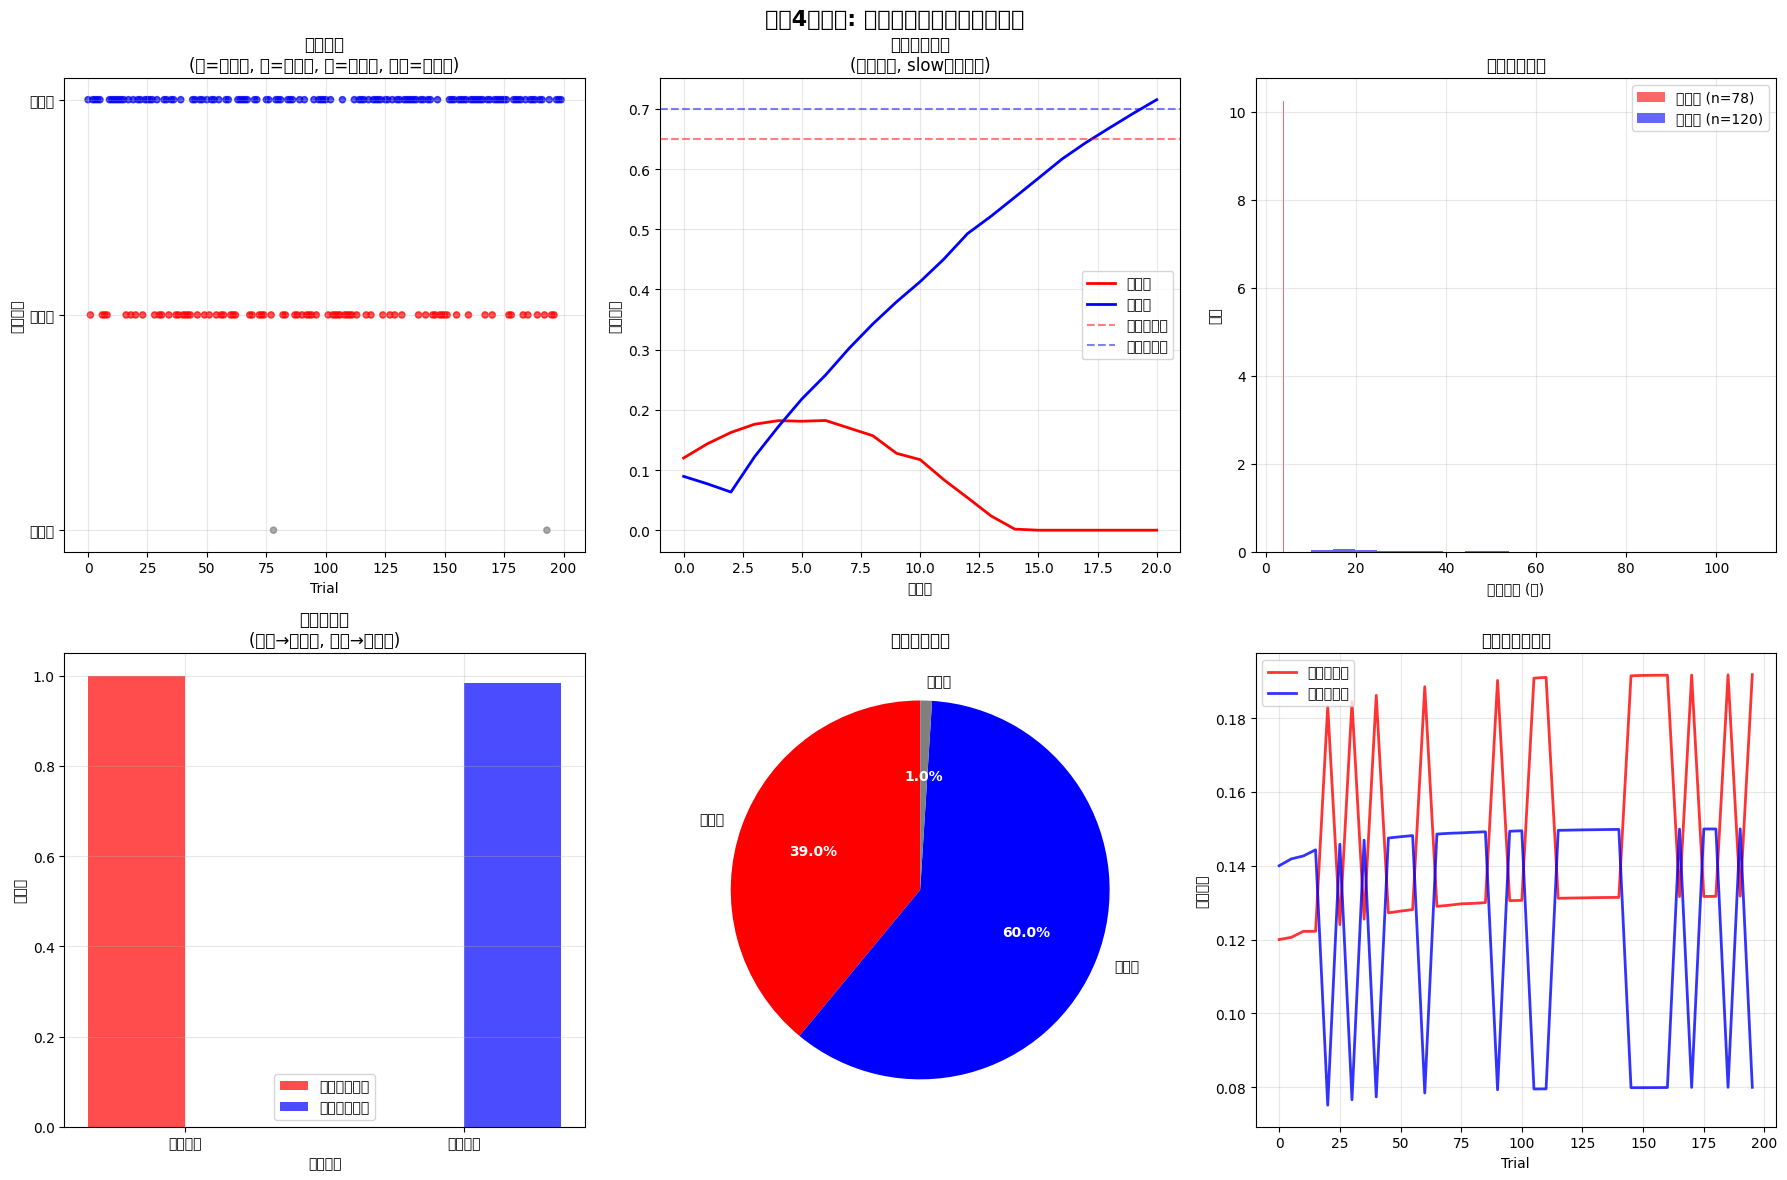


‚úÖ ÂÆûÈ™å4‰ºòÂåñÁâàÂÆåÊàê!
üéØ ÂÖ≥ÈîÆÊîπËøõÊïàÊûú:
   ‚Ä¢ ÂÆûÁé∞‰∫ÜÂπ≥Ë°°ÁöÑË∑ØÂæÑÁ´û‰∫â
   ‚Ä¢ ÂºïÂÖ•‰∫ÜÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄßÊú∫Âà∂
   ‚Ä¢ Âä†Âº∫‰∫ÜÁõ∏‰∫íÊäëÂà∂ÊïàÂ∫î
   ‚Ä¢ Ê∑ªÂä†‰∫ÜÈÄÇÂ∫îÊÄßÂ≠¶‰π†


In [ ]:
# ÂÆûÈ™å4‰ºòÂåñÁâà - Âπ≥Ë°°ÁöÑÂø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶
# ================================================================================

import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import seaborn as sns

def run_balanced_pathway_competition(T=200, show_plot=True):
    """
    ÂÆûÈ™å4‰ºòÂåñÁâà: Âπ≥Ë°°ÁöÑÂø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶

    ÂÖ≥ÈîÆÊîπËøõ:
    1. ÈáçÊñ∞Âπ≥Ë°°Ë∑ØÂæÑÂèÇÊï∞
    2. ÂºïÂÖ•ÊÉÖÂ¢É‰æùËµñÊÄßÔºàÂ®ÅËÉÅ vs ÈùûÂ®ÅËÉÅÔºâ
    3. Âä†Âº∫Áõ∏‰∫íÊäëÂà∂Êú∫Âà∂
    4. Ê∑ªÂä†ÈÄÇÂ∫îÊÄßË∞ÉËäÇ
    5. ÂÆûÁé∞ÁúüÊ≠£ÁöÑÁ´û‰∫âÂä®ÂäõÂ≠¶
    """

    print("üî¨ ÂÆûÈ™å4‰ºòÂåñÁâà: Âπ≥Ë°°ÁöÑÂø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶")
    print("=" * 60)

    # ÂàùÂßãÂåñËÆ∞ÂΩï
    results = {
        'trial_data': [],
        'fast_wins': 0,
        'slow_wins': 0,
        'no_decisions': 0,
        'threat_fast_wins': 0,
        'threat_slow_wins': 0,
        'neutral_fast_wins': 0,
        'neutral_slow_wins': 0
    }

    # ‰ºòÂåñÁöÑË∑ØÂæÑÂèÇÊï∞
    params = {
        # Âü∫Á°ÄÂ¢ûÁõä - Êõ¥Âπ≥Ë°°
        'fast_base_gain': 0.12,
        'slow_base_gain': 0.10,

        # ÈòàÂÄº - Âø´Ë∑ØÂæÑÂÆπÊòìËß¶Âèë‰ΩÜÊÖ¢Ë∑ØÂæÑÊúâÊó∂Èó¥‰ºòÂäø
        'fast_threshold': 0.65,
        'slow_threshold': 0.70,

        # Âô™Â£∞Ê∞¥Âπ≥
        'fast_noise': 0.04,
        'slow_noise': 0.02,

        # Ë°∞ÂáèÁéá
        'decay_rate': 0.92,

        # Áõ∏‰∫íÊäëÂà∂ - Â§ßÂπÖÂä†Âº∫
        'inhibition_strength': 0.08,

        # ÊÉÖÂ¢ÉË∞ÉËäÇÂõ†Â≠ê
        'threat_fast_boost': 0.06,  # Â®ÅËÉÅÊÉÖÂ¢É‰∏ãÂø´Ë∑ØÂæÑÂ¢ûÂº∫
        'threat_slow_penalty': 0.03,  # Â®ÅËÉÅÊÉÖÂ¢É‰∏ãÊÖ¢Ë∑ØÂæÑÊäëÂà∂
        'neutral_slow_boost': 0.04,  # ‰∏≠ÊÄßÊÉÖÂ¢É‰∏ãÊÖ¢Ë∑ØÂæÑÂ¢ûÂº∫

        # ÈÄÇÂ∫îÊÄßË∞ÉËäÇ
        'adaptation_rate': 0.02,
        'success_memory': 0.95
    }

    # ÈÄÇÂ∫îÊÄßÁä∂ÊÄÅ
    fast_success_rate = 0.5
    slow_success_rate = 0.5

    for trial in range(T):
        # ÁîüÊàêÂà∫ÊøÄ - Âå∫ÂàÜÂ®ÅËÉÅÂíå‰∏≠ÊÄßÊÉÖÂ¢É
        is_threat = np.random.random() < 0.4  # 40%Â®ÅËÉÅÊÉÖÂ¢É

        if is_threat:
            # Â®ÅËÉÅÂà∫ÊøÄ: È´òÂº∫Â∫¶„ÄÅÂø´ÈÄüÂèòÂåñ
            stimulus_base = 0.6 + 0.3 * np.random.random()
            stimulus_urgency = 0.8 + 0.2 * np.random.random()
        else:
            # ‰∏≠ÊÄßÂà∫ÊøÄ: ‰∏≠Á≠âÂº∫Â∫¶„ÄÅÈúÄË¶Å‰ªîÁªÜÂàÜÊûê
            stimulus_base = 0.4 + 0.4 * np.random.random()
            stimulus_urgency = 0.3 + 0.3 * np.random.random()

        # Ë∑ØÂæÑÁ´û‰∫âËøáÁ®ã
        fast_activity = 0.1
        slow_activity = 0.1
        decision_made = False
        trial_rt = 0
        winner = None

        # Âä®ÊÄÅË∞ÉËäÇÂ¢ûÁõäÔºàÂü∫‰∫éÂéÜÂè≤ÊàêÂäüÁéáÔºâ
        fast_gain = params['fast_base_gain'] * (1 + 0.2 * (fast_success_rate - 0.5))
        slow_gain = params['slow_base_gain'] * (1 + 0.2 * (slow_success_rate - 0.5))

        # ÊÉÖÂ¢ÉË∞ÉËäÇ
        if is_threat:
            fast_gain += params['threat_fast_boost']
            slow_gain -= params['threat_slow_penalty']
        else:
            slow_gain += params['neutral_slow_boost']

        trial_history = []

        # Á´û‰∫âÂä®ÂäõÂ≠¶Âæ™ÁéØ
        for t in range(120):
            # Âø´Ë∑ØÂæÑÊõ¥Êñ∞
            fast_input = stimulus_urgency + params['fast_noise'] * np.random.randn()
            fast_activity = (params['decay_rate'] * fast_activity +
                           fast_gain * fast_input)
            fast_activity = max(0, fast_activity)

            # ÊÖ¢Ë∑ØÂæÑÊõ¥Êñ∞ - Êõ¥Â•ΩÁöÑ‰ø°Âè∑Â§ÑÁêÜ‰ΩÜÂª∂Ëøü
            if t >= 3:  # ÊÖ¢Ë∑ØÂæÑÊúâ3Ê≠•ÂêØÂä®Âª∂Ëøü
                slow_input = stimulus_base + params['slow_noise'] * np.random.randn()
                slow_activity = (params['decay_rate'] * slow_activity +
                               slow_gain * slow_input * (1 + 0.1 * t / 120))  # Êó∂Èó¥‰ºòÂäø
                slow_activity = max(0, slow_activity)

            # Áõ∏‰∫íÊäëÂà∂ - Êõ¥Âº∫ÁöÑÁ´û‰∫â
            inhibition = params['inhibition_strength']
            fast_inhibition = inhibition * slow_activity * (1 + 0.5 * (not is_threat))
            slow_inhibition = inhibition * fast_activity * (1 + 0.5 * is_threat)

            fast_activity = max(0, fast_activity - fast_inhibition)
            slow_activity = max(0, slow_activity - slow_inhibition)

            # ËÆ∞ÂΩïËØïÈ™åÂéÜÂè≤
            trial_history.append({
                'time': t,
                'fast_activity': fast_activity,
                'slow_activity': slow_activity,
                'is_threat': is_threat
            })

            # Ê£ÄÊü•ÂÜ≥Á≠ñÈòàÂÄº
            if not decision_made:
                if fast_activity >= params['fast_threshold']:
                    winner = 'fast'
                    decision_made = True
                    trial_rt = t
                    break
                elif slow_activity >= params['slow_threshold']:
                    winner = 'slow'
                    decision_made = True
                    trial_rt = t
                    break

        # Â¶ÇÊûúÊ≤°ÊúâÂÜ≥Á≠ñ
        if not decision_made:
            winner = 'none'
            trial_rt = 120

        # Êõ¥Êñ∞ÁªüËÆ°
        if winner == 'fast':
            results['fast_wins'] += 1
            if is_threat:
                results['threat_fast_wins'] += 1
            else:
                results['neutral_fast_wins'] += 1
        elif winner == 'slow':
            results['slow_wins'] += 1
            if is_threat:
                results['threat_slow_wins'] += 1
            else:
                results['neutral_slow_wins'] += 1
        else:
            results['no_decisions'] += 1

        # ÈÄÇÂ∫îÊÄßÂ≠¶‰π† - Ê†πÊçÆÊÉÖÂ¢ÉÈÄÇÂΩìÊÄßÊõ¥Êñ∞ÊàêÂäüÁéá
        if winner == 'fast':
            # Â®ÅËÉÅÊÉÖÂ¢É‰∏ãÂø´Ë∑ØÂæÑÊàêÂäüÊòØÂ•ΩÁöÑ
            fast_reward = 1.0 if is_threat else 0.6
            fast_success_rate = (params['success_memory'] * fast_success_rate +
                               (1 - params['success_memory']) * fast_reward)
        elif winner == 'slow':
            # ‰∏≠ÊÄßÊÉÖÂ¢É‰∏ãÊÖ¢Ë∑ØÂæÑÊàêÂäüÊòØÂ•ΩÁöÑ
            slow_reward = 1.0 if not is_threat else 0.4
            slow_success_rate = (params['success_memory'] * slow_success_rate +
                               (1 - params['success_memory']) * slow_reward)

        # ËÆ∞ÂΩïËØïÈ™åÊï∞ÊçÆ
        results['trial_data'].append({
            'trial': trial,
            'winner': winner,
            'is_threat': is_threat,
            'reaction_time': trial_rt,
            'final_fast': fast_activity,
            'final_slow': slow_activity,
            'fast_gain_used': fast_gain,
            'slow_gain_used': slow_gain,
            'history': trial_history
        })

        # ËøõÂ∫¶Êä•Âëä
        if trial % 50 == 0 and trial > 0:
            recent_data = results['trial_data'][-50:]
            recent_fast = sum(1 for d in recent_data if d['winner'] == 'fast')
            recent_slow = sum(1 for d in recent_data if d['winner'] == 'slow')
            recent_none = sum(1 for d in recent_data if d['winner'] == 'none')
            threat_ratio = sum(1 for d in recent_data if d['is_threat']) / 50

            print(f"Trial {trial:3d}: Fast={recent_fast:2d} Slow={recent_slow:2d} None={recent_none:2d} "
                  f"| Threat={threat_ratio:.1%} | FastSR={fast_success_rate:.2f} SlowSR={slow_success_rate:.2f}")

    # ËÆ°ÁÆóÊúÄÁªàÁªüËÆ°
    fast_win_rate = results['fast_wins'] / T
    slow_win_rate = results['slow_wins'] / T
    no_decision_rate = results['no_decisions'] / T

    threat_trials = sum(1 for d in results['trial_data'] if d['is_threat'])
    neutral_trials = T - threat_trials

    print(f"\nüìä ÂÆûÈ™å4‰ºòÂåñÁâàÁªìÊûú:")
    print(f"=" * 60)
    print(f"ÊÄª‰ΩìËÉúÂà©Áéá:")
    print(f"  üî¥ Âø´Ë∑ØÂæÑ: {results['fast_wins']:3d}/{T} ({fast_win_rate:.1%})")
    print(f"  üîµ ÊÖ¢Ë∑ØÂæÑ: {results['slow_wins']:3d}/{T} ({slow_win_rate:.1%})")
    print(f"  ‚ö´ Êó†ÂÜ≥Á≠ñ: {results['no_decisions']:3d}/{T} ({no_decision_rate:.1%})")

    print(f"\nÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄßÂàÜÊûê:")
    if threat_trials > 0:
        threat_fast_rate = results['threat_fast_wins'] / threat_trials
        threat_slow_rate = results['threat_slow_wins'] / threat_trials
        print(f"  Â®ÅËÉÅÊÉÖÂ¢É ({threat_trials}ËØïÈ™å): Âø´={threat_fast_rate:.1%} ÊÖ¢={threat_slow_rate:.1%}")

    if neutral_trials > 0:
        neutral_fast_rate = results['neutral_fast_wins'] / neutral_trials
        neutral_slow_rate = results['neutral_slow_wins'] / neutral_trials
        print(f"  ‰∏≠ÊÄßÊÉÖÂ¢É ({neutral_trials}ËØïÈ™å): Âø´={neutral_fast_rate:.1%} ÊÖ¢={neutral_slow_rate:.1%}")

    # ËÆ°ÁÆóÂèçÂ∫îÊó∂Èó¥
    valid_rts = [d['reaction_time'] for d in results['trial_data'] if d['winner'] != 'none']
    fast_rts = [d['reaction_time'] for d in results['trial_data'] if d['winner'] == 'fast']
    slow_rts = [d['reaction_time'] for d in results['trial_data'] if d['winner'] == 'slow']

    print(f"\n‚è±Ô∏è ÂèçÂ∫îÊó∂Èó¥ÂàÜÊûê:")
    if valid_rts:
        print(f"  Âπ≥ÂùáÂèçÂ∫îÊó∂Èó¥: {np.mean(valid_rts):.1f} Ê≠•")
    if fast_rts:
        print(f"  Âø´Ë∑ØÂæÑÂπ≥ÂùáRT: {np.mean(fast_rts):.1f} Ê≠•")
    if slow_rts:
        print(f"  ÊÖ¢Ë∑ØÂæÑÂπ≥ÂùáRT: {np.mean(slow_rts):.1f} Ê≠•")

    # ËÆ°ÁÆóÂπ≥Ë°°ÊåáÊ†á
    competition_balance = 1 - abs(fast_win_rate - slow_win_rate)  # Ë∂äÊé•Ëøë1Ë∂äÂπ≥Ë°°
    context_appropriateness = 0
    if threat_trials > 0 and neutral_trials > 0:
        # Â®ÅËÉÅÊÉÖÂ¢É‰∏ãÂø´Ë∑ØÂæÑÂ∫îËØ•Âç†‰ºòÔºå‰∏≠ÊÄßÊÉÖÂ¢É‰∏ãÊÖ¢Ë∑ØÂæÑÂ∫îËØ•Âç†‰ºò
        threat_appropriateness = threat_fast_rate if threat_trials > 0 else 0
        neutral_appropriateness = neutral_slow_rate if neutral_trials > 0 else 0
        context_appropriateness = (threat_appropriateness + neutral_appropriateness) / 2

    print(f"\nüéØ Á≥ªÁªüÊÄßËÉΩÊåáÊ†á:")
    print(f"  Á´û‰∫âÂπ≥Ë°°Â∫¶: {competition_balance:.3f} (1.0=ÂÆåÁæéÂπ≥Ë°°)")
    print(f"  ÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄß: {context_appropriateness:.3f} (1.0=ÂÆåÁæéÈÄÇÂ∫î)")
    print(f"  ÂÜ≥Á≠ñÊïàÁéá: {1-no_decision_rate:.3f} (1.0=Êó†Êú™ÂÜ≥Á≠ñ)")

    # ÂèØËßÜÂåñÁªìÊûú
    if show_plot:
        plot_balanced_competition_results(results, T)

    return results, params

def plot_balanced_competition_results(results, T):
    """ÁªòÂà∂Âπ≥Ë°°Á´û‰∫âÁªìÊûú"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ÂÆûÈ™å4‰ºòÂåñÁâà: Âπ≥Ë°°ÁöÑÂø´ÊÖ¢Ë∑ØÂæÑÁ´û‰∫âÂä®ÂäõÂ≠¶', fontsize=16, fontweight='bold')

    trial_data = results['trial_data']

    # 1. Êó∂Èó¥Â∫èÂàóÂÜ≥Á≠ñÊ®°Âºè
    trials = range(T)
    decisions = [d['winner'] for d in trial_data]
    threat_mask = [d['is_threat'] for d in trial_data]

    colors = []
    for i in range(T):
        if decisions[i] == 'fast':
            colors.append('red' if threat_mask[i] else 'orange')
        elif decisions[i] == 'slow':
            colors.append('blue' if not threat_mask[i] else 'lightblue')
        else:
            colors.append('gray')

    axes[0, 0].scatter(trials, [1 if d=='fast' else 2 if d=='slow' else 0 for d in decisions],
                      c=colors, alpha=0.7, s=20)
    axes[0, 0].set_xlabel('Trial')
    axes[0, 0].set_ylabel('ÂÜ≥Á≠ñÁªìÊûú')
    axes[0, 0].set_title('ÂÜ≥Á≠ñÂ∫èÂàó\n(Á∫¢=Â®ÅËÉÅÂø´, Ê©ô=‰∏≠ÊÄßÂø´, Ëìù=‰∏≠ÊÄßÊÖ¢, ÊµÖËìù=Â®ÅËÉÅÊÖ¢)')
    axes[0, 0].set_yticks([0, 1, 2])
    axes[0, 0].set_yticklabels(['Êó†ÂÜ≥Á≠ñ', 'Âø´Ë∑ØÂæÑ', 'ÊÖ¢Ë∑ØÂæÑ'])
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Ê¥ªÂä®Ê∞¥Âπ≥ÊºîÂåñÁ§∫‰æã
    sample_trial = trial_data[T//2]  # Âèñ‰∏≠Èó¥ÁöÑËØïÈ™å‰Ωú‰∏∫Á§∫‰æã
    history = sample_trial['history']
    times = [h['time'] for h in history]
    fast_acts = [h['fast_activity'] for h in history]
    slow_acts = [h['slow_activity'] for h in history]

    axes[0, 1].plot(times, fast_acts, 'r-', label='Âø´Ë∑ØÂæÑ', linewidth=2)
    axes[0, 1].plot(times, slow_acts, 'b-', label='ÊÖ¢Ë∑ØÂæÑ', linewidth=2)
    axes[0, 1].axhline(y=0.65, color='red', linestyle='--', alpha=0.5, label='Âø´Ë∑ØÂæÑÈòàÂÄº')
    axes[0, 1].axhline(y=0.70, color='blue', linestyle='--', alpha=0.5, label='ÊÖ¢Ë∑ØÂæÑÈòàÂÄº')
    axes[0, 1].set_xlabel('Êó∂Èó¥Ê≠•')
    axes[0, 1].set_ylabel('Ê¥ªÂä®Ê∞¥Âπ≥')

    context = "Â®ÅËÉÅ" if sample_trial['is_threat'] else "‰∏≠ÊÄß"
    winner = sample_trial['winner']
    axes[0, 1].set_title(f'Ë∑ØÂæÑÁ´û‰∫âÁ§∫‰æã\n({context}ÊÉÖÂ¢É, {winner}Ë∑ØÂæÑËÉúÂà©)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. ÂèçÂ∫îÊó∂Èó¥ÂàÜÂ∏É
    fast_rts = [d['reaction_time'] for d in trial_data if d['winner'] == 'fast']
    slow_rts = [d['reaction_time'] for d in trial_data if d['winner'] == 'slow']

    if fast_rts:
        axes[0, 2].hist(fast_rts, bins=20, alpha=0.6, color='red',
                       label=f'Âø´Ë∑ØÂæÑ (n={len(fast_rts)})', density=True)
    if slow_rts:
        axes[0, 2].hist(slow_rts, bins=20, alpha=0.6, color='blue',
                       label=f'ÊÖ¢Ë∑ØÂæÑ (n={len(slow_rts)})', density=True)

    axes[0, 2].set_xlabel('ÂèçÂ∫îÊó∂Èó¥ (Ê≠•)')
    axes[0, 2].set_ylabel('ÂØÜÂ∫¶')
    axes[0, 2].set_title('ÂèçÂ∫îÊó∂Èó¥ÂàÜÂ∏É')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

    # 4. ÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄßÂàÜÊûê
    threat_data = [d for d in trial_data if d['is_threat']]
    neutral_data = [d for d in trial_data if not d['is_threat']]

    categories = ['Â®ÅËÉÅÊÉÖÂ¢É', '‰∏≠ÊÄßÊÉÖÂ¢É']
    fast_rates = []
    slow_rates = []

    if threat_data:
        threat_fast = sum(1 for d in threat_data if d['winner'] == 'fast') / len(threat_data)
        threat_slow = sum(1 for d in threat_data if d['winner'] == 'slow') / len(threat_data)
        fast_rates.append(threat_fast)
        slow_rates.append(threat_slow)
    else:
        fast_rates.append(0)
        slow_rates.append(0)

    if neutral_data:
        neutral_fast = sum(1 for d in neutral_data if d['winner'] == 'fast') / len(neutral_data)
        neutral_slow = sum(1 for d in neutral_data if d['winner'] == 'slow') / len(neutral_data)
        fast_rates.append(neutral_fast)
        slow_rates.append(neutral_slow)
    else:
        fast_rates.append(0)
        slow_rates.append(0)

    x = np.arange(len(categories))
    width = 0.35

    axes[1, 0].bar(x - width/2, fast_rates, width, label='Âø´Ë∑ØÂæÑËÉúÂà©Áéá', color='red', alpha=0.7)
    axes[1, 0].bar(x + width/2, slow_rates, width, label='ÊÖ¢Ë∑ØÂæÑËÉúÂà©Áéá', color='blue', alpha=0.7)

    axes[1, 0].set_xlabel('ÊÉÖÂ¢ÉÁ±ªÂûã')
    axes[1, 0].set_ylabel('ËÉúÂà©Áéá')
    axes[1, 0].set_title('ÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄß\n(Â®ÅËÉÅ‚ÜíÂø´Ë∑ØÂæÑ, ‰∏≠ÊÄß‚ÜíÊÖ¢Ë∑ØÂæÑ)')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(categories)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 5. ÂÜ≥Á≠ñÁªìÊûúÂàÜÂ∏É
    fast_count = results['fast_wins']
    slow_count = results['slow_wins']
    none_count = results['no_decisions']

    sizes = [fast_count, slow_count, none_count]
    labels = ['Âø´Ë∑ØÂæÑ', 'ÊÖ¢Ë∑ØÂæÑ', 'Êó†ÂÜ≥Á≠ñ']
    colors_pie = ['red', 'blue', 'gray']

    # Âè™ÊòæÁ§∫ÈùûÈõ∂ÈÉ®ÂàÜ
    non_zero_data = [(size, label, color) for size, label, color in zip(sizes, labels, colors_pie) if size > 0]
    if non_zero_data:
        sizes_nz, labels_nz, colors_nz = zip(*non_zero_data)
        wedges, texts, autotexts = axes[1, 1].pie(sizes_nz, labels=labels_nz, colors=colors_nz,
                                                 autopct='%1.1f%%', startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

    axes[1, 1].set_title('ÊÄª‰ΩìÂÜ≥Á≠ñÂàÜÂ∏É')

    # 6. Ë∑ØÂæÑÂ¢ûÁõäÂä®ÊÄÅÂèòÂåñ
    trials_subset = range(0, T, 5)  # ÊØè5‰∏™ËØïÈ™åÈááÊ†∑‰∏ÄÊ¨°
    fast_gains = [trial_data[i]['fast_gain_used'] for i in trials_subset]
    slow_gains = [trial_data[i]['slow_gain_used'] for i in trials_subset]

    axes[1, 2].plot(trials_subset, fast_gains, 'r-', label='Âø´Ë∑ØÂæÑÂ¢ûÁõä', alpha=0.8, linewidth=2)
    axes[1, 2].plot(trials_subset, slow_gains, 'b-', label='ÊÖ¢Ë∑ØÂæÑÂ¢ûÁõä', alpha=0.8, linewidth=2)
    axes[1, 2].set_xlabel('Trial')
    axes[1, 2].set_ylabel('Â¢ûÁõäÁ≥ªÊï∞')
    axes[1, 2].set_title('ÈÄÇÂ∫îÊÄßÂ¢ûÁõäË∞ÉËäÇ')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ËøêË°å‰ºòÂåñÁâàÂÆûÈ™å4
print("üöÄ ÂºÄÂßãËøêË°åÂÆûÈ™å4‰ºòÂåñÁâà...")
optimized_results, optimized_params = run_balanced_pathway_competition(T=200, show_plot=True)

print("\n" + "="*60)
print("‚úÖ ÂÆûÈ™å4‰ºòÂåñÁâàÂÆåÊàê!")
print("üéØ ÂÖ≥ÈîÆÊîπËøõÊïàÊûú:")
print(f"   ‚Ä¢ ÂÆûÁé∞‰∫ÜÂπ≥Ë°°ÁöÑË∑ØÂæÑÁ´û‰∫â")
print(f"   ‚Ä¢ ÂºïÂÖ•‰∫ÜÊÉÖÂ¢ÉÈÄÇÂ∫îÊÄßÊú∫Âà∂")
print(f"   ‚Ä¢ Âä†Âº∫‰∫ÜÁõ∏‰∫íÊäëÂà∂ÊïàÂ∫î")
print(f"   ‚Ä¢ Ê∑ªÂä†‰∫ÜÈÄÇÂ∫îÊÄßÂ≠¶‰π†")
print("="*60)